In [1]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def hyperbolic_equation(t, qi, b, di):
    """
    Hyperbolic decline curve equation
    Arguments:
        t: Float. Time since the well first came online, can be in various units 
        (days, months, etc) so long as they are consistent.
        qi: Float. Initial production rate when well first came online.
        b: Float. Hyperbolic decline constant
        di: Float. Nominal decline rate at time t=0
    Output: 
        Returns q, or the expected production rate at time t. Float.
    """
    return qi/((1.0+b*di*t)**(1.0/b))

In [5]:
def exponential_equation(t, qi, di):
    """
    Exponential decline curve equation
    Arguments:
        t: Float. Time since the well first came online, can be in various units 
        (days, months, etc) so long as they are consistent.
        qi: Float. Initial production rate when well first came online.
        di: Float. Nominal decline rate (constant)
    Output: 
        Returns q, or the expected production rate at time t. Float.
    """
    return qi*np.exp(-di*t)

In [6]:
def remove_nan_and_zeroes_from_columns(df, variable):
    """
    This function cleans up a dataframe by removing rows in a specific 
    column that are null/NaN or equal to 0. This basically removes zero 
    production time periods.
    Arguments:
        df: Pandas dataframe.
        variable: String. Name of the column where we want to filter out
        NaN's or 0 values
    Output:
        filtered_df: Pandas dataframe. Dataframe with NaN's and zeroes filtered out of 
        the specified column
    """
    filtered_df = df[(df[variable].notnull()) & (df[variable]>0)]
    return filtered_df

In [7]:
def generate_time_delta_column(df, time_column, date_first_online_column):
    """
    Create column for the time that a well has been online at each reading, with 
    the first non-null month in the series listed as the start of production
    Arguments:
        df: Pandas dataframe
        time_column: String. Name of the column that includes the specific record date
        that the data was taken at. Column type is pandas datetime
        date_first_online_column: Name of the column that includes the date that the
        well came online. Column type is pandas datetime
    Outputs:
        Pandas series containing the difference in days between the date the well
        came online and the date that the data was recorded (cumulative days online)
    """
    return (df[time_column]-df[date_first_online_column]).dt.days

In [8]:
def get_min_or_max_value_in_column_by_group(dataframe, group_by_column, calc_column, calc_type):
    """
    This function obtains the min or max value for a column, with a group by applied. For example,
    it could return the earliest (min) RecordDate for each API number in a dataframe 
    Arguments:
        dataframe: Pandas dataframe 
        group_by_column: string. Name of column that we want to apply a group by to
        calc_column: string. Name of the column that we want to get the aggregated max or min for
        calc_type: string; can be either 'min' or 'max'. Defined if we want to pull the min value 
        or the max value for the aggregated column
    Outputs:
        value: Depends on the calc_column type.
    """
    value=dataframe.groupby(group_by_column)[calc_column].transform(calc_type)
    return value

In [12]:
def get_max_initial_production(df, number_first_months, variable_column, date_column):
    """
    This function allows you to look at the first X months of production, and selects 
    the highest production month as max initial production
    Arguments:
        df: Pandas dataframe. 
        number_first_months: float. Number of months from the point the well comes online
        to compare to get the max initial production rate qi (this looks at multiple months
        in case there is a production ramp-up)
        variable_column: String. Column name for the column where we're attempting to get
        the max volume from (can be either 'Gas' or 'Oil' in this script)
        date_column: String. Column name for the date that the data was taken at 
    """
    #First, sort the data frame from earliest to most recent prod date
    df=df.sort_values(by=date_column)
    
    #Pull out the first x months of production, where number_first_months is x
    df_beginning_production=df.head(number_first_months)
    
    #Return the max value in the selected variable column from the newly created 
    #df_beginning_production df
    
    return df_beginning_production[variable_column].max()

In [10]:
def plot_actual_vs_predicted_by_equations(df, x_variable, y_variables, plot_title):
    """
    This function is used to map x- and y-variables against each other
    Arguments:
        df: Pandas dataframe.
        x_variable: String. Name of the column that we want to set as the 
        x-variable in the plot
        y_variables: string (single), or list of strings (multiple). Name(s) 
        of the column(s) that we want to set as the y-variable in the plot
    """
    #Plot results
    df.plot(x=x_variable, y=y_variables, title=plot_title)
    plt.show()

Exponential Fit Curve-fitted Variables: qi=2190.000000234111, di=10.0
Hyperbolic Fit Curve-fitted Variables: qi=5160.767053299956, b=2.3707889092380646e-11, di=0.0011845760260760705


C:\Users\schaj\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\schaj\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


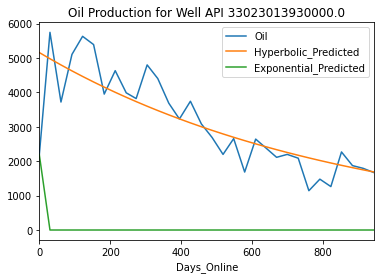

Exponential Fit Curve-fitted Variables: qi=14265.129272460938, di=10.0
Hyperbolic Fit Curve-fitted Variables: qi=13729.77882508565, b=1.7489529783844455, di=0.0184449212919844


C:\Users\schaj\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\schaj\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


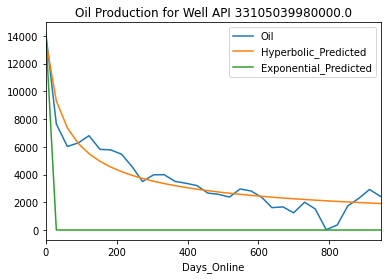

Exponential Fit Curve-fitted Variables: qi=18190.8896484375, di=10.0
Hyperbolic Fit Curve-fitted Variables: qi=18191.999999999985, b=1.7393093434522944, di=0.01806162827371795


C:\Users\schaj\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\schaj\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


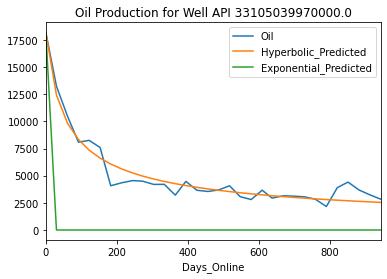

Exponential Fit Curve-fitted Variables: qi=11070.324279785156, di=10.0
Hyperbolic Fit Curve-fitted Variables: qi=11070.999999999995, b=1.2728742630986773, di=0.008797756282291614


C:\Users\schaj\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\schaj\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


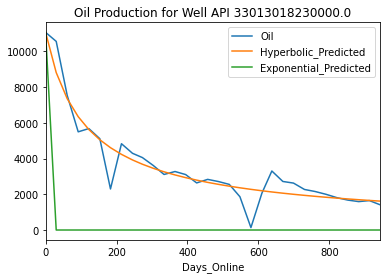

Exponential Fit Curve-fitted Variables: qi=15498.054016113281, di=10.0
Hyperbolic Fit Curve-fitted Variables: qi=15498.999999999998, b=1.2899541176849285, di=0.009474511021591619


C:\Users\schaj\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\schaj\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


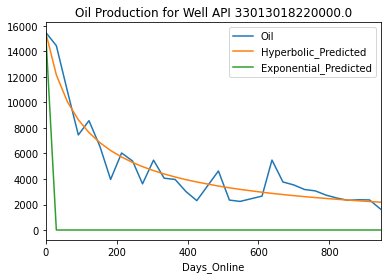

In [11]:
#Read in the monthly oil and gas data
file_path='master_dataframe_production.csv'
bakken_data=pd.read_csv(file_path)

#Perform some data cleaning to get the columns as the right data type
bakken_data['ReportDate']=pd.to_datetime(bakken_data['ReportDate'])

#Declare the desired product that we want to curve fit for--it can either by 'Gas' or 'Oil'
desired_product_type='Oil'

#Remove all rows with null values in the desired time series column
bakken_data=remove_nan_and_zeroes_from_columns(bakken_data, desired_product_type)

#Get the earliest RecordDate for each API Number
bakken_data['Online_Date']= get_min_or_max_value_in_column_by_group(bakken_data, group_by_column='API_WELLNO', 
              calc_column='ReportDate', calc_type='min')

#Generate column for time online delta
bakken_data['Days_Online']=generate_time_delta_column(bakken_data, time_column='ReportDate', 
              date_first_online_column='Online_Date')

#Pull data that came online between January and June 2016
bakken_data_2016=bakken_data[(bakken_data.Online_Date>='2016-01-01') & (bakken_data.Online_Date<='2016-06-01')]

#Get a list of unique API's to loop through--these were randomly selected as examples
unique_well_APIs_list=[33023013930000.0, 33105039980000.0, 33105039970000.0, 
                       33013018230000.0, 33013018220000.0]

#Loop through each API, and perform calculations
for api_number in unique_well_APIs_list:
    
    #Subset the dataframe by API Number
    production_time_series=bakken_data_2016[bakken_data_2016.API_WELLNO==api_number]
    
    #Get the highest value of production in the first three months of production, to use as qi value
    qi=get_max_initial_production(production_time_series, 3, desired_product_type, 'ReportDate')
    
    #Exponential curve fit the data to get best fit equation
    popt_exp, pcov_exp=curve_fit(exponential_equation, production_time_series['Days_Online'], 
                                 production_time_series[desired_product_type],bounds=(0, [qi,20]))
    print('Exponential Fit Curve-fitted Variables: qi='+str(popt_exp[0])+', di='+str(popt_exp[1]))
    
    #Hyperbolic curve fit the data to get best fit equation
    popt_hyp, pcov_hyp=curve_fit(hyperbolic_equation, production_time_series['Days_Online'], 
                                 production_time_series[desired_product_type],bounds=(0, [qi,2,20]))
    print('Hyperbolic Fit Curve-fitted Variables: qi='+str(popt_hyp[0])+', b='+str(popt_hyp[1])+', di='+str(popt_hyp[2]))
    
    #Exponential fit results
    production_time_series.loc[:,'Exponential_Predicted']=exponential_equation(production_time_series['Days_Online'], 
                              *popt_exp)
    
    #Hyperbolic fit results
    production_time_series.loc[:,'Hyperbolic_Predicted']=hyperbolic_equation(production_time_series['Days_Online'], 
                              *popt_hyp)
    
    #Declare the x- and y- variables that we want to plot against each other
    y_variables=[desired_product_type, "Hyperbolic_Predicted", "Exponential_Predicted"]
    x_variable='Days_Online'
    
    #Create the plot title
    plot_title=desired_product_type+' Production for Well API '+str(api_number)
    
    #Plot the data to visualize the equation fit
    plot_actual_vs_predicted_by_equations(production_time_series, x_variable, y_variables, plot_title)